#A Whale off the Port(folio)

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
#Display .CSV file to Dataframes
whale_data = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col = "Date")
#whale_df

#Removing Empty Cells
whale_df.dropna(inplace = True)
whale_df



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
#Display .CSV file to Dataframes
algo_data = Path("../Homework_4_WOP/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col = "Date")
#algo_df

#Removing empty cells
algo_df.dropna(inplace = True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [4]:
#Display .CSV file to Dataframes
sp500_data = Path("sp500_history.csv")
sp500_df = pd.read_csv(sp500_data)

#Removing Empty Cells
sp500_df.dropna(inplace = True)
sp500_df

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [5]:
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [6]:
#Removing the '$' from all values in each DataFrame
sp500_df["Close"] = sp500_df["Close"].str.replace("$", '')
sp500_df["Close"] = sp500_df["Close"].str.replace(".", '')
sp500_df


,Date,Close
0,23-Apr-19,293368
1,22-Apr-19,290797
2,18-Apr-19,290503
3,17-Apr-19,290045
4,16-Apr-19,290706
...,...,...
1644,5-Oct-12,146093
1645,4-Oct-12,146140
1646,3-Oct-12,145099
1647,2-Oct-12,144575


In [7]:
#Converting Close Column to Int
sp500_col = sp500_df["Close"]
sp500_df = sp500_col.astype(int)



In [8]:
#sp_500_daily_return = int(sp500_data.pct_change(252))
sp_500_daily_return = sp500_df[:-1].values/sp500_df[1:] - 1
sp500_df = sp_500_daily_return.astype(object)
sp500_df

1       0.008841
2       0.001012
3       0.001579
4      -0.002274
5       0.000509
          ...   
1644   -0.003457
1645   -0.000322
1646    0.007174
1647    0.003624
1648    0.000872
Name: Close, Length: 1648, dtype: object

In [9]:
#Join all csv files to one DataFrame
new_df = pd.concat([whale_df, algo_df, sp500_df])
#df_merged = whale_df.merge(algo_df, on="Date", how="inner")
#df_merged
#new_df = df_merged.merge(sp500_df, how='inner')
new_df.fillna(0.0, inplace = True)
new_df.rename(columns = {'0': '500'})
new_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,0
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.0,0.0,0.000000
2015-03-04,0.002230,0.003241,-0.002534,0.004213,0.0,0.0,0.000000
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.0,0.0,0.000000
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,0.0,0.0,0.000000
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
1644,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.003457
1645,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.000322
1646,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.007174
1647,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.003624


<Axes: title={'center': 'Daily Returns'}>

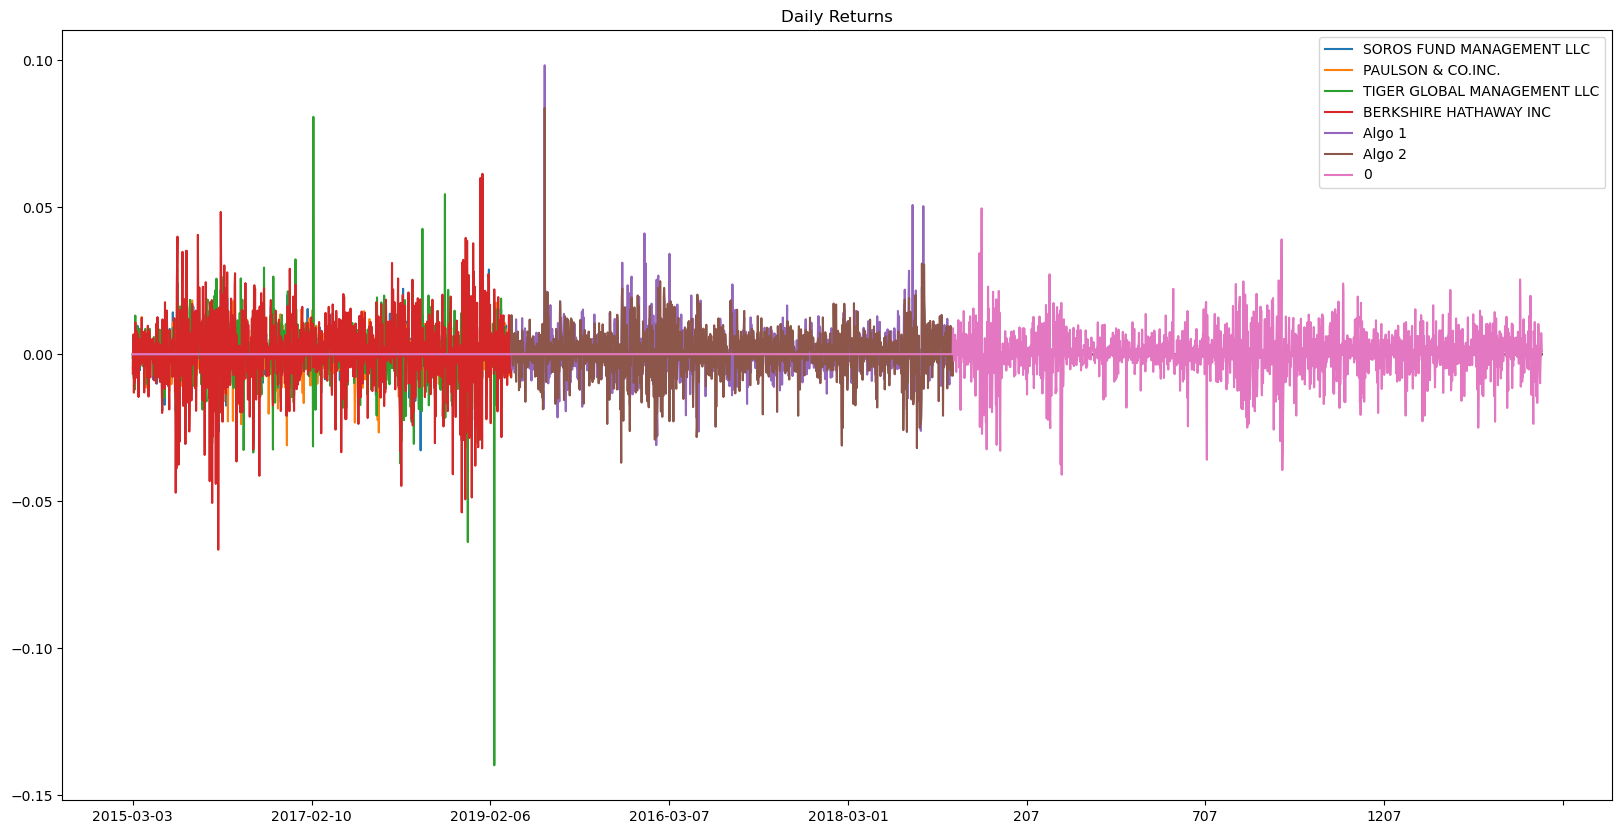

In [11]:
#Plot dail returns of all portfolios
new_df.plot(figsize=(20, 10), title = "Daily Returns")

<Axes: title={'center': 'Cumulative Returns'}>

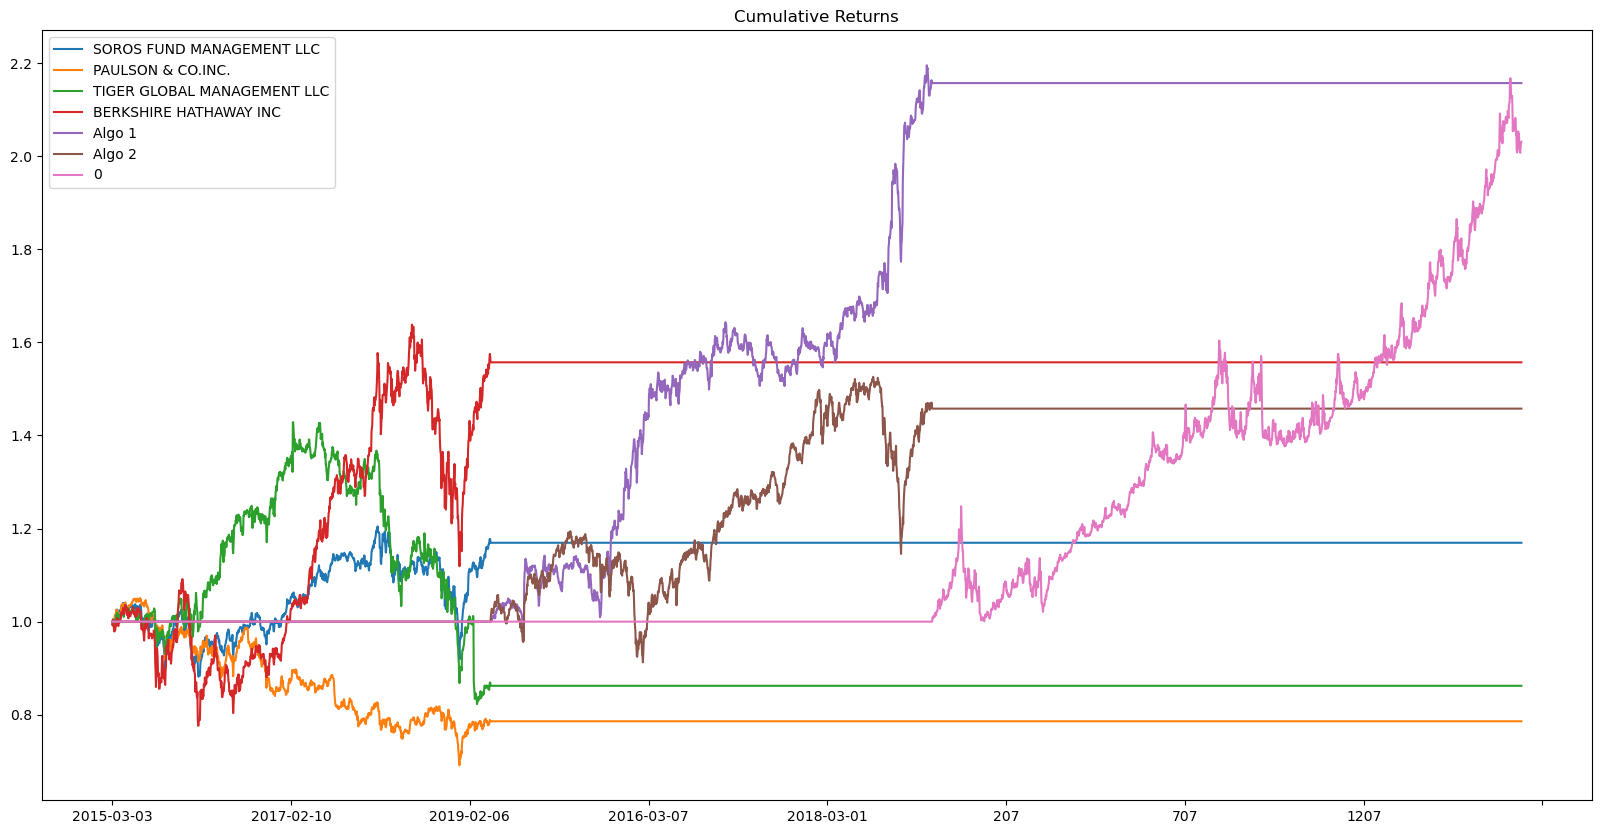

In [15]:
#Cumlative Returns
cum_returns = (1 + new_df).cumprod()

#Plot Returns
cum_returns.plot(figsize=(20, 10), title = "Cumulative Returns")

<Axes: title={'center': 'Cumulative Returns'}>

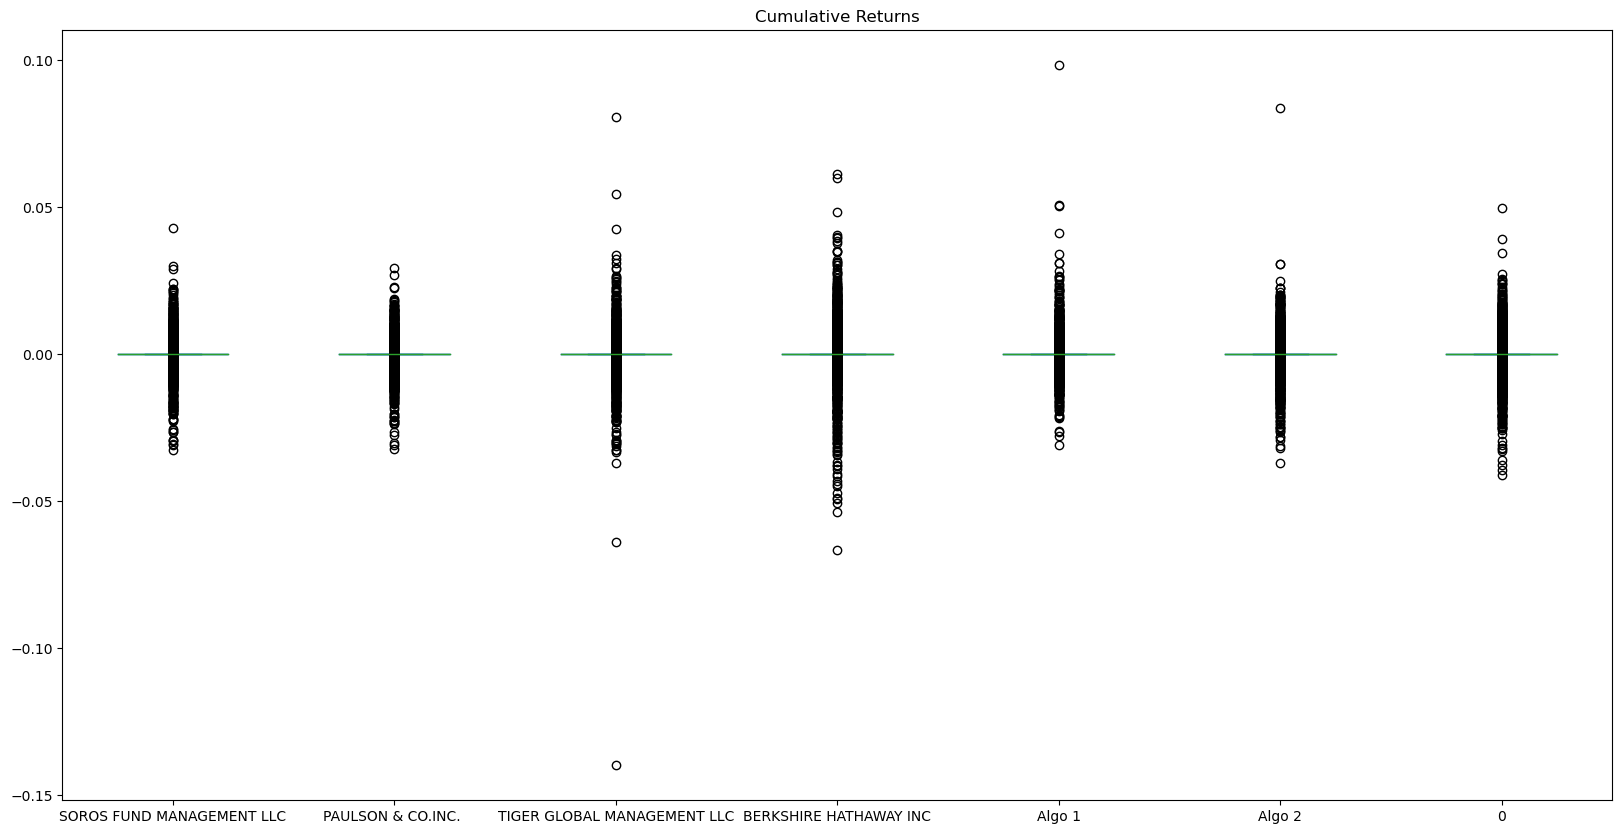

In [16]:
#Box Plot Returns
new_df.plot.box(figsize=(20, 10), title = "Cumulative Returns")

In [17]:
#Standard Deviations
new_df.std()

SOROS FUND MANAGEMENT LLC      0.004064
PAULSON & CO.INC.              0.003616
TIGER GLOBAL MANAGEMENT LLC    0.005609
BERKSHIRE HATHAWAY INC         0.006652
Algo 1                         0.004480
Algo 2                         0.004740
0                              0.005249
dtype: float64

In [19]:
#Portfolios Riskier then S&P500
#Calculate daily standard deviation for S&P 500
sp500 = new_df[0].std()

#Portfolios which are riskier then SP 500
new_df.std() > sp500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
0                              False
dtype: bool

In [20]:
#Calculate annulaized Standard Deviation for 252 trading days
yearly_std = new_df.std() + np.sqrt(252)
yearly_std

SOROS FUND MANAGEMENT LLC      15.878572
PAULSON & CO.INC.              15.878124
TIGER GLOBAL MANAGEMENT LLC    15.880116
BERKSHIRE HATHAWAY INC         15.881160
Algo 1                         15.878988
Algo 2                         15.879248
0                              15.879756
dtype: float64

<Axes: title={'center': '21 Day Rolling Standard Deviation'}>

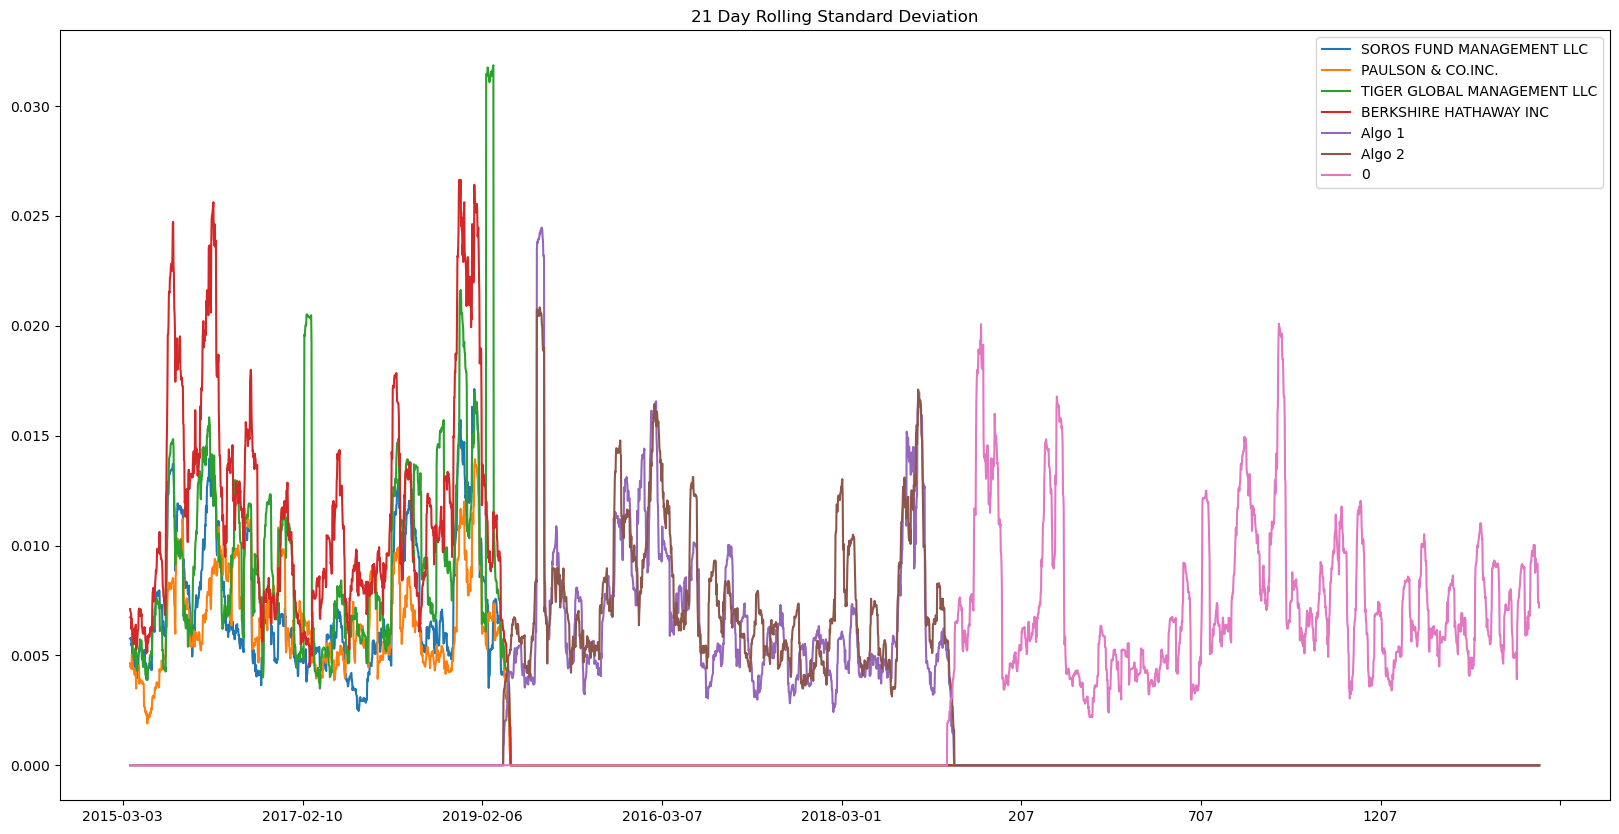

In [21]:
#Calculating plot rolling Standard Deviation for all portfolios within a 21 day window
new_df_roll_std = new_df.rolling(window=21).std()

#Plot Rolling Statndard Deviation
new_df_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

In [22]:
#Calcuating Correlation
correlation_df = new_df.corr()

#Displaying Correlation matrix
correlation_df.style.background_gradient(cmap='winter')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,0
SOROS FUND MANAGEMENT LLC,1.000000,0.699346,0.561503,0.754395,-0.000540,-0.000266,-0.000435
PAULSON & CO.INC.,0.699346,1.000000,0.435348,0.544498,0.000691,0.000340,0.000557
TIGER GLOBAL MANAGEMENT LLC,0.561503,0.435348,1.000000,0.424643,0.000177,0.000087,0.000142
BERKSHIRE HATHAWAY INC,0.754395,0.544498,0.424643,1.000000,-0.000926,-0.000456,-0.000746
Algo 1,-0.000540,0.000691,0.000177,-0.000926,1.000000,0.347839,-0.001687
Algo 2,-0.000266,0.000340,0.000087,-0.000456,0.347839,1.000000,-0.000831
0,-0.000435,0.000557,0.000142,-0.000746,-0.001687,-0.000831,1.000000


<Axes: title={'center': 'Berkshire Hathaway Inc. Beta'}>

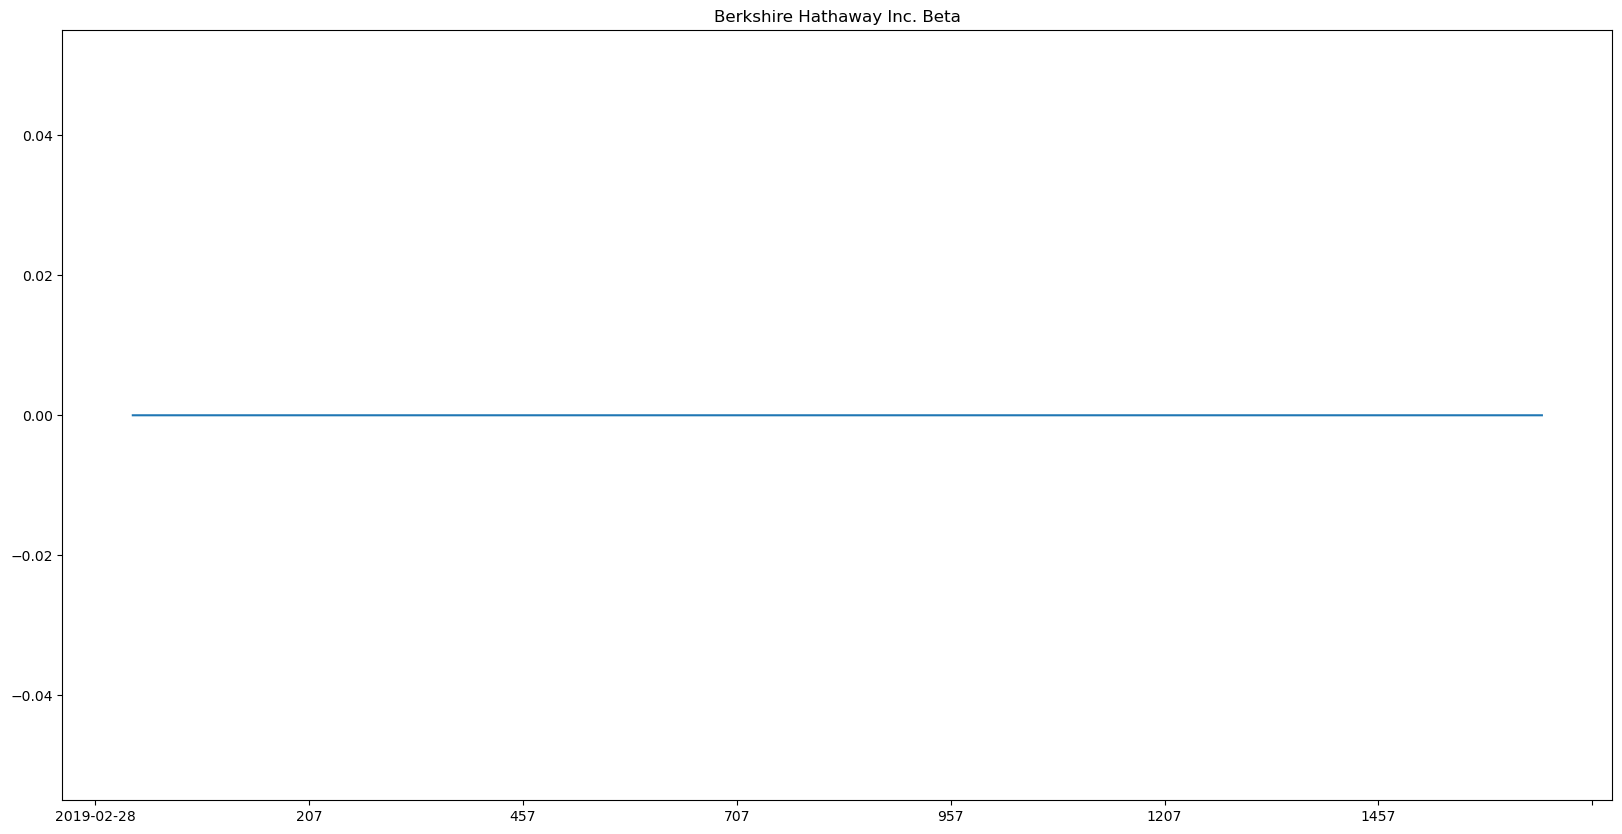

In [27]:
#Calculate Plot Beta for a particular portfolio and the SP 500
covariance = new_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(new_df[0])

#Calculating variance of SP TSX
variance = new_df[0].rolling(60).var()

#Computing the beta
beta = covariance / variance

#Plotting beta
beta.plot(figsize=(20, 10), title = 'Berkshire Hathaway Inc. Beta')

<Axes: title={'center': 'Exponentially Weighted Average'}>

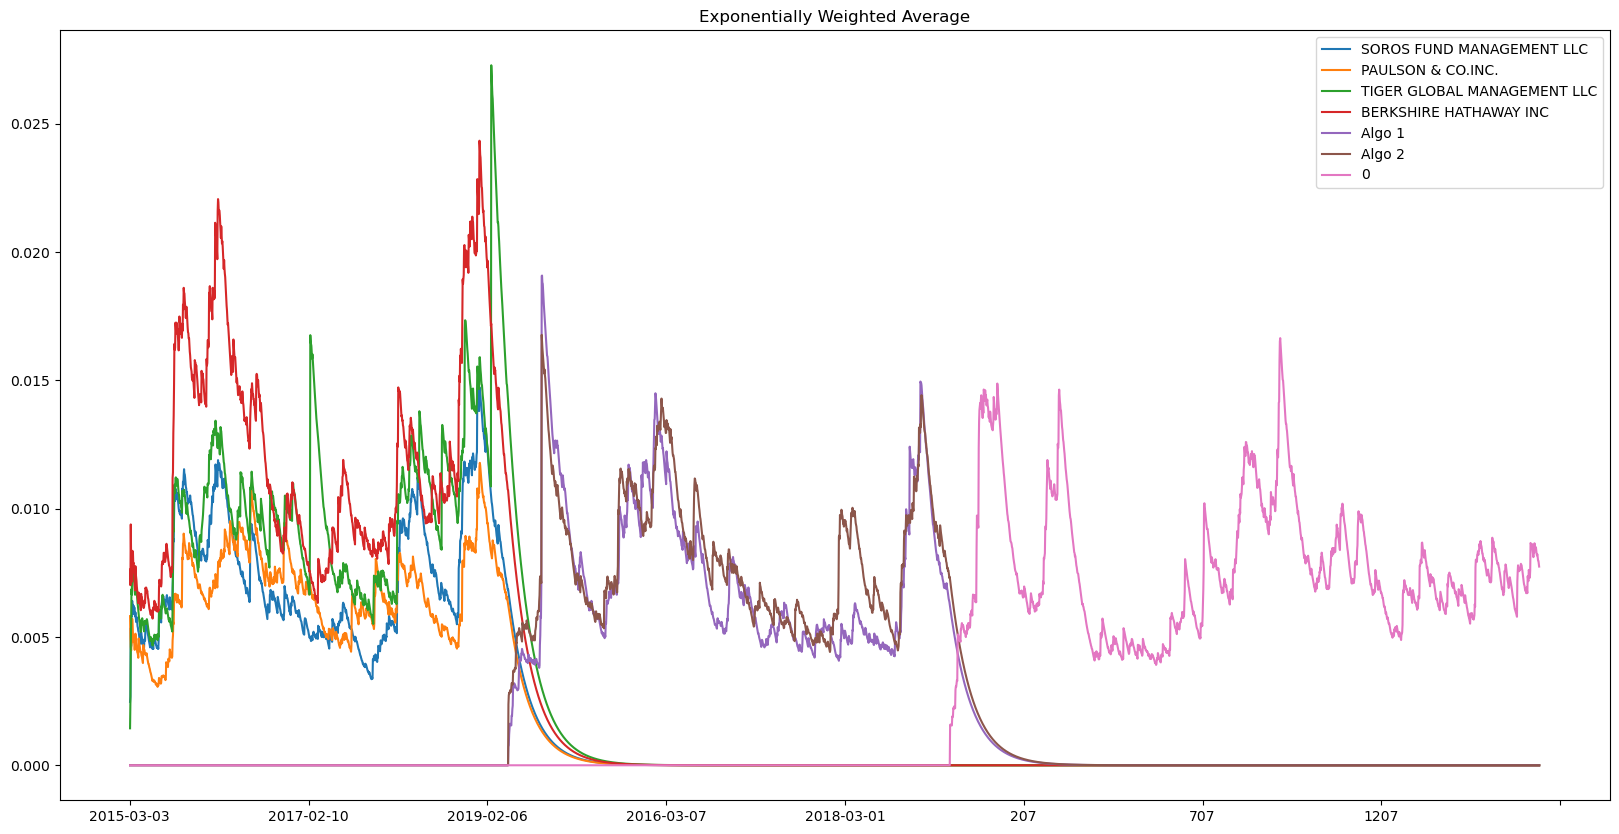

In [29]:
#Rolling Statistics: Exponentially Weighted Average
new_df.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

In [31]:
#Calculating daily returns, visuallize and calculate Sharpe Rations on bar plot
sharpe_ratios = (new_df.mean() * 252) / (new_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.187434
PAULSON & CO.INC.             -0.239536
TIGER GLOBAL MANAGEMENT LLC   -0.061314
BERKSHIRE HATHAWAY INC         0.321091
Algo 1                         0.726272
Algo 2                         0.357709
0                              0.585366
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

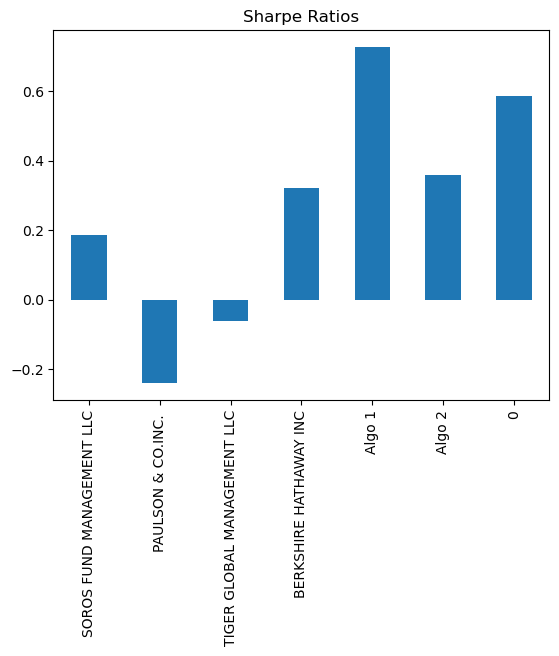

In [33]:
#Plot Sharpe Ratios
sharpe_ratios.plot(kind= "bar", title="Sharpe Ratios")